In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from urllib.parse import urlparse
from tld import get_tld
import re
from sklearn.model_selection import train_test_split
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import f1_score,log_loss,precision_score,recall_score,make_scorer,accuracy_score
import json

## Multi-Class Multi-Output Classification

In [2]:
l1=pd.read_csv("FinalDataset/URL/Benign_list_big_final.csv", header=None)
l1['result'] = [[] for _ in range(l1.shape[0])]
for i in range(l1.shape[0]):
    l1.at[i,'result'].append(1)
    l1.at[i,'result'].append(0)
    l1.at[i,'result'].append(0)
    l1.at[i,'result'].append(0)
    l1.at[i,'result'].append(0)
l1['type'] = 'Benign'
l1

,0,result,type
0,http://1337x.to/torrent/1048648/American-Snipe...,"[1, 0, 0, 0, 0]",Benign
1,http://1337x.to/torrent/1110018/Blackhat-2015-...,"[1, 0, 0, 0, 0]",Benign
2,http://1337x.to/torrent/1122940/Blackhat-2015-...,"[1, 0, 0, 0, 0]",Benign
3,http://1337x.to/torrent/1124395/Fast-and-Furio...,"[1, 0, 0, 0, 0]",Benign
4,http://1337x.to/torrent/1145504/Avengers-Age-o...,"[1, 0, 0, 0, 0]",Benign
...,...,...,...
35373,https://lastpass.com/signup2.php?ac=1&from_uri...,"[1, 0, 0, 0, 0]",Benign
35374,https://lastpass.com/signup2.php?ac=1&from_uri...,"[1, 0, 0, 0, 0]",Benign
35375,https://lastpass.com/signup2.php?ac=1&from_uri...,"[1, 0, 0, 0, 0]",Benign
35376,https://lastpass.com/signup2.php?ac=1&from_uri...,"[1, 0, 0, 0, 0]",Benign


In [3]:
l2=pd.read_csv("FinalDataset/URL/DefacementSitesURLFiltered.csv", header=None)
l2['result'] = [[] for _ in range(l2.shape[0])]
for i in range(l2.shape[0]):
    l2.at[i,'result'].append(0)
    l2.at[i,'result'].append(1)
    l2.at[i,'result'].append(0)
    l2.at[i,'result'].append(0)
    l2.at[i,'result'].append(0)
l2['type'] = 'Defacement'
l2

,0,result,type
0,http://www.sinduscongoias.com.br/index.html,"[0, 1, 0, 0, 0]",Defacement
1,http://www.sinduscongoias.com.br/index.php/ins...,"[0, 1, 0, 0, 0]",Defacement
2,http://www.sinduscongoias.com.br/index.php/ins...,"[0, 1, 0, 0, 0]",Defacement
3,http://www.sinduscongoias.com.br/index.php/ins...,"[0, 1, 0, 0, 0]",Defacement
4,http://www.sinduscongoias.com.br/index.php/ins...,"[0, 1, 0, 0, 0]",Defacement
...,...,...,...
96452,http://www.laurenzano.com.ar/index.php?option=...,"[0, 1, 0, 0, 0]",Defacement
96453,http://www.laurenzano.com.ar/templates/laurenz...,"[0, 1, 0, 0, 0]",Defacement
96454,http://www.laurenzano.com.ar/templates/laurenz...,"[0, 1, 0, 0, 0]",Defacement
96455,http://www.laurenzano.com.ar/x.txt,"[0, 1, 0, 0, 0]",Defacement


In [4]:
l3=pd.read_csv("FinalDataset/URL/Malware_dataset.csv", header=None)
l3['result'] = [[] for _ in range(l3.shape[0])]
for i in range(l3.shape[0]):
    l3.at[i,'result'].append(0)
    l3.at[i,'result'].append(0)
    l3.at[i,'result'].append(1)
    l3.at[i,'result'].append(0)
    l3.at[i,'result'].append(0)
l3['type'] = 'Malware'
l3

,0,result,type
0,http://gzzax.livechatvalue.com/chat/chatClient...,"[0, 0, 1, 0, 0]",Malware
1,http://gzzax.livechatvalue.com/chat/chatClient...,"[0, 0, 1, 0, 0]",Malware
2,http://gzzax.livechatvalue.com/chat/chatClient...,"[0, 0, 1, 0, 0]",Malware
3,http://gzzax.livechatvalue.com/chat/chatClient...,"[0, 0, 1, 0, 0]",Malware
4,http://mtsx.com.cn/UploadFiles/2011-08/admin/%...,"[0, 0, 1, 0, 0]",Malware
...,...,...,...
11561,http://www.plastischechirurgie.net/gesicht/fac...,"[0, 0, 1, 0, 0]",Malware
11562,http://www.plastischechirurgie.net/haartranspl...,"[0, 0, 1, 0, 0]",Malware
11563,http://www.plastischechirurgie.net/korper/gyna...,"[0, 0, 1, 0, 0]",Malware
11564,http://dl.get1993desk.com/n/50517366/RealPlaye...,"[0, 0, 1, 0, 0]",Malware


In [5]:
l4=pd.read_csv("FinalDataset/URL/phishing_dataset.csv", header=None)
l4['result'] = [[] for _ in range(l4.shape[0])]
for i in range(l4.shape[0]):
    l4.at[i,'result'].append(0)
    l4.at[i,'result'].append(0)
    l4.at[i,'result'].append(0)
    l4.at[i,'result'].append(1)
    l4.at[i,'result'].append(0)
l4['type'] = 'Phishing'
l4

,0,result,type
0,http://v2.email-marketing.adminsimple.com/trac...,"[0, 0, 0, 1, 0]",Phishing
1,http://bid.openx.net/json?amp;amp;amp;amp;cid;...,"[0, 0, 0, 1, 0]",Phishing
2,http://webmail2.centurytel.net/hwebmail/servic...,"[0, 0, 0, 1, 0]",Phishing
3,http://www.google.com.ng/imgres?imgurl=http://...,"[0, 0, 0, 1, 0]",Phishing
4,http://webmail2.centurytel.net/hwebmail/servic...,"[0, 0, 0, 1, 0]",Phishing
...,...,...,...
9960,http://highedgesolar.com/nw/includes/,"[0, 0, 0, 1, 0]",Phishing
9961,http://jimfangimporters.yolasite.com/,"[0, 0, 0, 1, 0]",Phishing
9962,http://liuheng.chengxuren.com/Images/,"[0, 0, 0, 1, 0]",Phishing
9963,http://mcnaotempreco.net/site/portal/,"[0, 0, 0, 1, 0]",Phishing


In [6]:
l5=pd.read_csv("FinalDataset/URL/spam_dataset.csv", header=None)
l5['result'] = [[] for _ in range(l5.shape[0])]
for i in range(l5.shape[0]):
    l5.at[i,'result'].append(0)
    l5.at[i,'result'].append(0)
    l5.at[i,'result'].append(0)
    l5.at[i,'result'].append(0)
    l5.at[i,'result'].append(1)
l5['type'] = 'Spam'
l5

,0,result,type
0,http://astore.amazon.co.uk/allezvinsfrenchr/de...,"[0, 0, 0, 0, 1]",Spam
1,http://archive.salisburyjournal.co.uk/2007/3/6...,"[0, 0, 0, 0, 1]",Spam
2,http://appbasic.jettons.co.uk/links/index.html,"[0, 0, 0, 0, 1]",Spam
3,http://archive.yorkpress.co.uk/2003/11/6/25684...,"[0, 0, 0, 0, 1]",Spam
4,http://acard4u.co.uk/product_reviews.php?cPath...,"[0, 0, 0, 0, 1]",Spam
...,...,...,...
11995,http://archive.salisburyjournal.co.uk/2001/3/7/,"[0, 0, 0, 0, 1]",Spam
11996,http://astore.amazon.co.uk/allezvinsfrenchr/de...,"[0, 0, 0, 0, 1]",Spam
11997,http://archive.thisischeshire.co.uk/2000/1/14/...,"[0, 0, 0, 0, 1]",Spam
11998,http://applerugs.co.uk/rugs/product_info.php?p...,"[0, 0, 0, 0, 1]",Spam


In [7]:
data=[l1,l2,l3,l4,l5]
dataset = pd.concat(data)
dataset

,0,result,type
0,http://1337x.to/torrent/1048648/American-Snipe...,"[1, 0, 0, 0, 0]",Benign
1,http://1337x.to/torrent/1110018/Blackhat-2015-...,"[1, 0, 0, 0, 0]",Benign
2,http://1337x.to/torrent/1122940/Blackhat-2015-...,"[1, 0, 0, 0, 0]",Benign
3,http://1337x.to/torrent/1124395/Fast-and-Furio...,"[1, 0, 0, 0, 0]",Benign
4,http://1337x.to/torrent/1145504/Avengers-Age-o...,"[1, 0, 0, 0, 0]",Benign
...,...,...,...
11995,http://archive.salisburyjournal.co.uk/2001/3/7/,"[0, 0, 0, 0, 1]",Spam
11996,http://astore.amazon.co.uk/allezvinsfrenchr/de...,"[0, 0, 0, 0, 1]",Spam
11997,http://archive.thisischeshire.co.uk/2000/1/14/...,"[0, 0, 0, 0, 1]",Spam
11998,http://applerugs.co.uk/rugs/product_info.php?p...,"[0, 0, 0, 0, 1]",Spam


In [8]:
#dataset.to_csv('multiclass_urldata.csv')

In [9]:
urls = pd.read_csv("multiclass_urldata.csv")
urls = urls.rename({'0': 'url'}, axis=1)
urls

,Unnamed: 0,url,result,type
0,0,http://www.sinduscongoias.com.br/index.html,"[1, 0, 0, 0]",Defacement
1,1,http://www.sinduscongoias.com.br/index.php/ins...,"[1, 0, 0, 0]",Defacement
2,2,http://www.sinduscongoias.com.br/index.php/ins...,"[1, 0, 0, 0]",Defacement
3,3,http://www.sinduscongoias.com.br/index.php/ins...,"[1, 0, 0, 0]",Defacement
4,4,http://www.sinduscongoias.com.br/index.php/ins...,"[1, 0, 0, 0]",Defacement
...,...,...,...,...
129983,11995,http://archive.salisburyjournal.co.uk/2001/3/7/,"[0, 0, 0, 1]",Spam
129984,11996,http://astore.amazon.co.uk/allezvinsfrenchr/de...,"[0, 0, 0, 1]",Spam
129985,11997,http://archive.thisischeshire.co.uk/2000/1/14/...,"[0, 0, 0, 1]",Spam
129986,11998,http://applerugs.co.uk/rugs/product_info.php?p...,"[0, 0, 0, 1]",Spam


<AxesSubplot:xlabel='type', ylabel='count'>

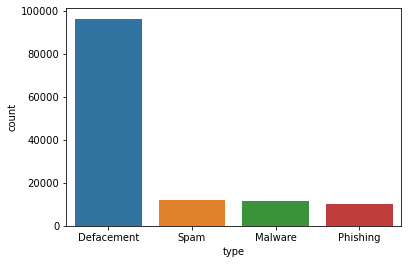

In [10]:
sns.countplot(x = 'type', data = urls, order = urls['type'].value_counts().index)

In [11]:
def tld_length(tld):
    try:
        return len(tld)
    except:
        return -1
def directories(url):
    urldir = urlparse(url).path
    return urldir.count('/')

def digit(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits

def letter(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters

def ip_address(url):
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|' 
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)'
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}', url) 
    if match:
        return 1
    else:
        return 0

In [12]:
urls['lengthOfURL']=urls['url'].apply(lambda i: len(str(i)))
urls['lengthOfHostname']=urls['url'].apply(lambda i: len(urlparse(i).netloc))
urls['lengthOfPath']=urls['url'].apply(lambda i: len(urlparse(i).path))
urls['tld'] = urls['url'].apply(lambda i: get_tld(i,fail_silently=True))
urls['lengthOfTLD'] = urls['tld'].apply(lambda i: tld_length(i))
urls=urls.drop(columns=['tld'])
urls['Tally(dir)'] = urls['url'].apply(lambda i: directories(i))
urls['Tally(digits)']= urls['url'].apply(lambda i: digit(i))
urls['Tally(letters)']= urls['url'].apply(lambda i: letter(i))
urls['IP'] = urls['url'].apply(lambda i: ip_address(i))
urls['Tally(.)'] = urls['url'].apply(lambda i: i.count('.'))
urls['Tally(-)'] = urls['url'].apply(lambda i: i.count('-'))
urls['Tally(@)'] = urls['url'].apply(lambda i: i.count('@'))
urls['Tally(%)'] = urls['url'].apply(lambda i: i.count('%'))
urls['Tally(=)'] = urls['url'].apply(lambda i: i.count('='))
urls['Tally(/)'] = urls['url'].apply(lambda i: i.count('/'))
urls['Tally(?)'] = urls['url'].apply(lambda i: i.count('?'))
urls['Tally(+)'] = urls['url'].apply(lambda i: i.count('+'))
urls['Tally(//)'] = urls['url'].apply(lambda i: i.count('//'))

In [13]:
urls

,Unnamed: 0,url,result,type,lengthOfURL,lengthOfHostname,lengthOfPath,lengthOfTLD,Tally(dir),Tally(digits),...,IP,Tally(.),Tally(-),Tally(@),Tally(%),Tally(=),Tally(/),Tally(?),Tally(+),Tally(//)
0,0,http://www.sinduscongoias.com.br/index.html,"[1, 0, 0, 0]",Defacement,43,25,11,6,1,0,...,0,4,0,0,0,0,3,0,0,1
1,1,http://www.sinduscongoias.com.br/index.php/ins...,"[1, 0, 0, 0]",Defacement,58,25,26,6,2,1,...,0,5,0,0,0,0,4,0,0,1
2,2,http://www.sinduscongoias.com.br/index.php/ins...,"[1, 0, 0, 0]",Defacement,66,25,34,6,3,0,...,0,4,0,0,0,0,5,0,0,1
3,3,http://www.sinduscongoias.com.br/index.php/ins...,"[1, 0, 0, 0]",Defacement,65,25,33,6,3,0,...,0,4,0,0,0,0,5,0,0,1
4,4,http://www.sinduscongoias.com.br/index.php/ins...,"[1, 0, 0, 0]",Defacement,109,25,77,6,3,0,...,0,4,7,0,0,0,5,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129983,11995,http://archive.salisburyjournal.co.uk/2001/3/7/,"[0, 0, 0, 1]",Spam,47,30,10,5,4,6,...,0,3,0,0,0,0,6,0,0,1
129984,11996,http://astore.amazon.co.uk/allezvinsfrenchr/de...,"[0, 0, 0, 1]",Spam,81,19,55,5,4,23,...,0,3,2,0,0,0,6,0,0,1
129985,11997,http://archive.thisischeshire.co.uk/2000/1/14/...,"[0, 0, 0, 1]",Spam,57,28,22,5,4,13,...,0,4,0,0,0,0,6,0,0,1
129986,11998,http://applerugs.co.uk/rugs/product_info.php?p...,"[0, 0, 0, 1]",Spam,116,15,22,5,2,25,...,0,3,0,0,0,4,4,3,0,1


In [14]:
def adjuster(x):
    l=[]
    x=x.replace(',','')[1:-1].split(' ')
    for i in x:
        if i!=',' or i!=' ':
            l.append(int(i))
    return np.array(l)

urls['result_final'] = urls['result'].apply(lambda x:adjuster(x))
urls

,Unnamed: 0,url,result,type,lengthOfURL,lengthOfHostname,lengthOfPath,lengthOfTLD,Tally(dir),Tally(digits),...,Tally(.),Tally(-),Tally(@),Tally(%),Tally(=),Tally(/),Tally(?),Tally(+),Tally(//),result_final
0,0,http://www.sinduscongoias.com.br/index.html,"[1, 0, 0, 0]",Defacement,43,25,11,6,1,0,...,4,0,0,0,0,3,0,0,1,"[1, 0, 0, 0]"
1,1,http://www.sinduscongoias.com.br/index.php/ins...,"[1, 0, 0, 0]",Defacement,58,25,26,6,2,1,...,5,0,0,0,0,4,0,0,1,"[1, 0, 0, 0]"
2,2,http://www.sinduscongoias.com.br/index.php/ins...,"[1, 0, 0, 0]",Defacement,66,25,34,6,3,0,...,4,0,0,0,0,5,0,0,1,"[1, 0, 0, 0]"
3,3,http://www.sinduscongoias.com.br/index.php/ins...,"[1, 0, 0, 0]",Defacement,65,25,33,6,3,0,...,4,0,0,0,0,5,0,0,1,"[1, 0, 0, 0]"
4,4,http://www.sinduscongoias.com.br/index.php/ins...,"[1, 0, 0, 0]",Defacement,109,25,77,6,3,0,...,4,7,0,0,0,5,0,0,1,"[1, 0, 0, 0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129983,11995,http://archive.salisburyjournal.co.uk/2001/3/7/,"[0, 0, 0, 1]",Spam,47,30,10,5,4,6,...,3,0,0,0,0,6,0,0,1,"[0, 0, 0, 1]"
129984,11996,http://astore.amazon.co.uk/allezvinsfrenchr/de...,"[0, 0, 0, 1]",Spam,81,19,55,5,4,23,...,3,2,0,0,0,6,0,0,1,"[0, 0, 0, 1]"
129985,11997,http://archive.thisischeshire.co.uk/2000/1/14/...,"[0, 0, 0, 1]",Spam,57,28,22,5,4,13,...,4,0,0,0,0,6,0,0,1,"[0, 0, 0, 1]"
129986,11998,http://applerugs.co.uk/rugs/product_info.php?p...,"[0, 0, 0, 1]",Spam,116,15,22,5,2,25,...,3,0,0,0,4,4,3,0,1,"[0, 0, 0, 1]"


In [15]:
dt = RandomForestClassifier(max_depth=7)
clf = OneVsRestClassifier(dt)

In [16]:
scoring = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score, average = 'micro'),
           'recall': make_scorer(recall_score, average = 'micro'),
           'f1': make_scorer(f1_score, average = 'micro'),
           'log_loss': make_scorer(log_loss)}

In [17]:
scores = cross_validate(clf, urls.drop(columns=['Unnamed: 0','url','result','type','result_final']), np.array(urls['result_final'].tolist()), cv=5,scoring=scoring,return_train_score=True)
scores

{'fit_time': array([14.84254861, 14.3193562 , 14.33766007, 14.69132495,  6.60217428]),
 'score_time': array([0.53030324, 0.55894923, 0.59699702, 0.52317286, 0.32492995]),
 'test_accuracy': array([0.92899454, 0.95618894, 0.96095854, 0.82863407, 0.01392468]),
 'train_accuracy': array([0.86300606, 0.86471776, 0.86797769, 0.90003943, 0.97970978]),
 'test_precision': array([0.99039405, 0.99444356, 0.98797129, 0.87837233, 0.01397206]),
 'train_precision': array([0.93638661, 0.93487404, 0.93348453, 0.93222908, 0.98151162]),
 'test_recall': array([0.9319563 , 0.9568813 , 0.96357412, 0.83032658, 0.01400162]),
 'train_recall': array([0.86941052, 0.87642081, 0.87869987, 0.91085767, 0.98017136]),
 'test_f1': array([0.96028695, 0.9753009 , 0.9756202 , 0.85367397, 0.01398682]),
 'train_f1': array([0.90165651, 0.90470424, 0.9052641 , 0.92141947, 0.98084103]),
 'test_log_loss': array([ 0.29786211,  0.20955941,  0.35453085,  3.97824556, 33.8980745 ]),
 'train_log_loss': array([1.92999969, 1.81490959, 1

In [18]:
print("The Fit Time is: ",scores['fit_time'].mean())
print("\n")
print("The Score Time is: ",scores['score_time'].mean())
print("\n")
print("The Train Accuracy score is: ",scores['train_accuracy'].mean())
print("\n")
print("The Train F1 score is: ",scores['train_f1'].mean())
print("\n")
print("The Train Precision score is: ",scores['train_precision'].mean())
print("\n")
print("The Train Recall score is: ",scores['train_recall'].mean())
print("\n")
print("The Train Log Loss is: ",scores['train_log_loss'].mean())
print("\n")
print("The Test Accuracy score is: ",scores['test_accuracy'].mean())
print("\n")
print("The Test F1 score is: ",scores['test_f1'].mean())
print("\n")
print("The Test Precision score is: ",scores['test_precision'].mean())
print("\n")
print("The Test Recall score is: ",scores['test_recall'].mean())
print("\n")
print("The Test Log Loss is: ",scores['test_log_loss'].mean())
print("\n")

The Fit Time is:  12.958612823486328


The Score Time is:  0.5068704605102539


The Train Accuracy score is:  0.8950901437653446


The Train F1 score is:  0.9227770687264535


The Train Precision score is:  0.9436971741431937


The Train Recall score is:  0.9031120472564067


The Train Log Loss is:  1.6462382588467253


The Test Accuracy score is:  0.7377401535407091


The Test F1 score is:  0.7557737682275614


The Test Precision score is:  0.7730306557720054


The Test Recall score is:  0.7393479831386391


The Test Log Loss is:  7.747654487825406




In [19]:
dt = RandomForestClassifier(max_depth=7)
clf = OneVsRestClassifier(dt)

In [20]:
clf.fit(urls.drop(columns=['Unnamed: 0','url','result','type','result_final']), np.array(urls['result_final'].tolist()))

OneVsRestClassifier(estimator=RandomForestClassifier(max_depth=7))

lengthOfURL  has importance of  0.02365150765835712
lengthOfHostname  has importance of  0.03609936619270079
lengthOfPath  has importance of  0.10324856050205086
lengthOfTLD  has importance of  0.14604940768774874
Tally(dir)  has importance of  0.11985858503462432
Tally(digits)  has importance of  0.2165004835610053
Tally(letters)  has importance of  0.01959330509776138
IP  has importance of  0.0004134403379144903
Tally(.)  has importance of  0.05922943801022752
Tally(-)  has importance of  0.0745802416847634
Tally(@)  has importance of  0.0005263540129437565
Tally(%)  has importance of  0.036404467013565485
Tally(=)  has importance of  0.020679839541593425
Tally(/)  has importance of  0.12211016310504152
Tally(?)  has importance of  0.01398570066278369
Tally(+)  has importance of  0.00024089137591630792
Tally(//)  has importance of  0.006828248521001789


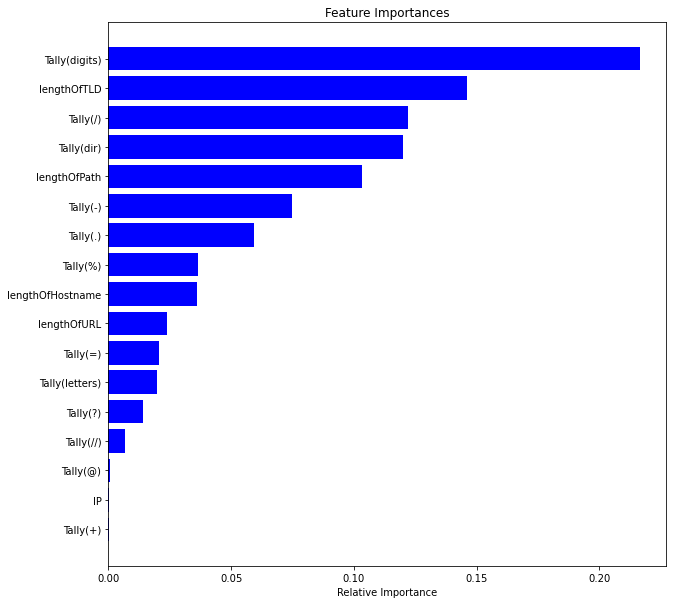

lengthOfURL  has importance of  0.06524946744042408
lengthOfHostname  has importance of  0.18305780352848833
lengthOfPath  has importance of  0.09133796218620406
lengthOfTLD  has importance of  0.049424461992137264
Tally(dir)  has importance of  0.04419035183422015
Tally(digits)  has importance of  0.05543087594584303
Tally(letters)  has importance of  0.08926315771503476
IP  has importance of  0.0004058832457043281
Tally(.)  has importance of  0.10939664497648824
Tally(-)  has importance of  0.029491150149856357
Tally(@)  has importance of  8.20562870733351e-05
Tally(%)  has importance of  0.1941171854212558
Tally(=)  has importance of  0.029894067134815766
Tally(/)  has importance of  0.03368587006944101
Tally(?)  has importance of  0.0124688529198185
Tally(+)  has importance of  0.0008692387281405394
Tally(//)  has importance of  0.011634970425054377


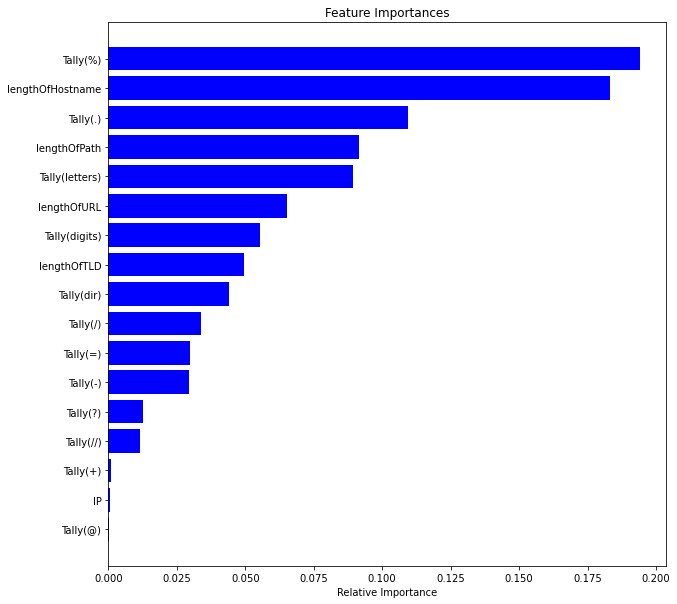

lengthOfURL  has importance of  0.05206574872042989
lengthOfHostname  has importance of  0.1737583739710163
lengthOfPath  has importance of  0.12342550464918926
lengthOfTLD  has importance of  0.0374823259858392
Tally(dir)  has importance of  0.05413355540454832
Tally(digits)  has importance of  0.05889595630660483
Tally(letters)  has importance of  0.02797679480846805
IP  has importance of  0.008711982072776321
Tally(.)  has importance of  0.17473020385540713
Tally(-)  has importance of  0.033919475545857454
Tally(@)  has importance of  0.00019299764964133883
Tally(%)  has importance of  0.006757107052677935
Tally(=)  has importance of  0.05037571197826758
Tally(/)  has importance of  0.11676209733285599
Tally(?)  has importance of  0.04605310479536298
Tally(+)  has importance of  0.000365875927412582
Tally(//)  has importance of  0.03439318394364478


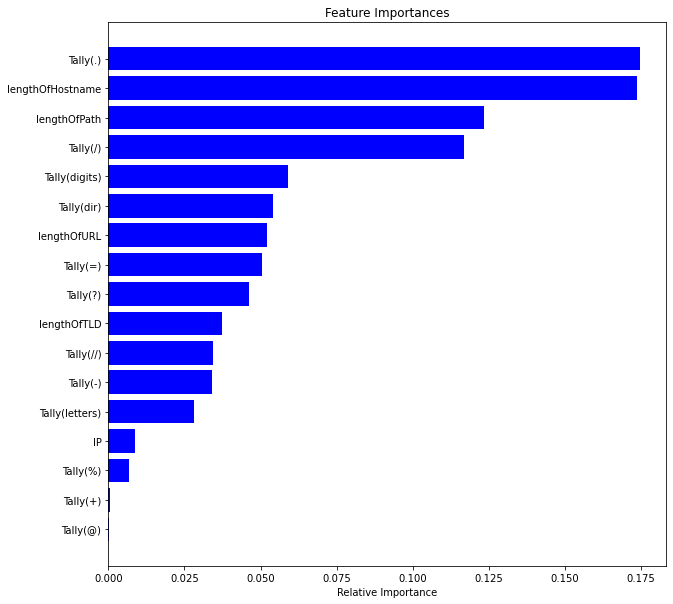

lengthOfURL  has importance of  0.032198152286456616
lengthOfHostname  has importance of  0.05806254460085151
lengthOfPath  has importance of  0.05578988677156736
lengthOfTLD  has importance of  0.4199985024550427
Tally(dir)  has importance of  0.05529016758884685
Tally(digits)  has importance of  0.1486934665152218
Tally(letters)  has importance of  0.04767567656262388
IP  has importance of  0.00010313285286550381
Tally(.)  has importance of  0.032745552539950123
Tally(-)  has importance of  0.03308632751213814
Tally(@)  has importance of  0.0008319455298923861
Tally(%)  has importance of  0.0024629248422239894
Tally(=)  has importance of  0.02150205913152979
Tally(/)  has importance of  0.05556493550911324
Tally(?)  has importance of  0.0346287888739047
Tally(+)  has importance of  0.00033577288179474564
Tally(//)  has importance of  0.0010301635459766696


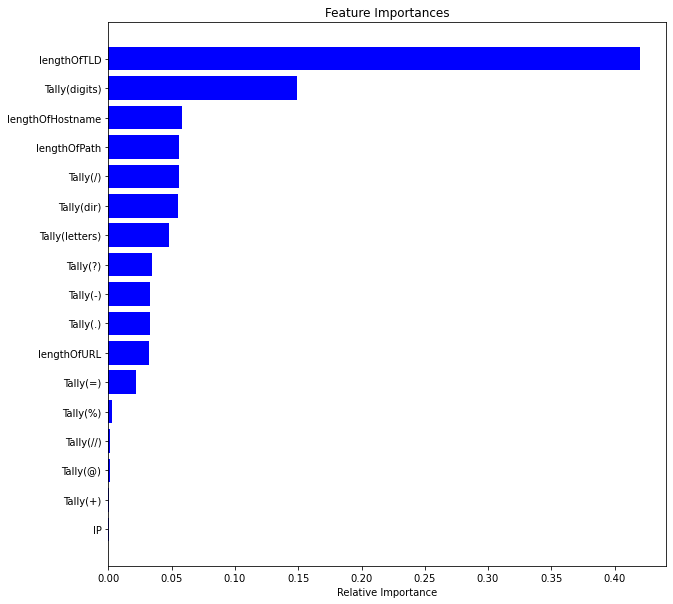

In [21]:
features = urls.drop(columns=['Unnamed: 0','url','result','type','result_final']).columns
for i in range(0,4):
    importances = clf.estimators_[i].feature_importances_
    indices = np.argsort(importances)
    for i in range(len(indices)):
        print(features[i]," has importance of ",importances[i])
    plt.figure(figsize=(10,10))
    plt.title('Feature Importances')
    plt.barh(range(len(indices)), importances[indices], color='b', align='center')
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()

## Multi Class Classification

In [22]:
l2=pd.read_csv("FinalDataset/URL/DefacementSitesURLFiltered.csv", header=None)
l2['result'] = [1 for _ in range(l2.shape[0])]
l2['type'] = 'Defacement'
l2

,0,result,type
0,http://www.sinduscongoias.com.br/index.html,1,Defacement
1,http://www.sinduscongoias.com.br/index.php/ins...,1,Defacement
2,http://www.sinduscongoias.com.br/index.php/ins...,1,Defacement
3,http://www.sinduscongoias.com.br/index.php/ins...,1,Defacement
4,http://www.sinduscongoias.com.br/index.php/ins...,1,Defacement
...,...,...,...
96452,http://www.laurenzano.com.ar/index.php?option=...,1,Defacement
96453,http://www.laurenzano.com.ar/templates/laurenz...,1,Defacement
96454,http://www.laurenzano.com.ar/templates/laurenz...,1,Defacement
96455,http://www.laurenzano.com.ar/x.txt,1,Defacement


In [23]:
l3=pd.read_csv("FinalDataset/URL/Malware_dataset.csv", header=None)
l3['result'] = [2 for _ in range(l3.shape[0])]
l3['type'] = 'Malware'
l3

,0,result,type
0,http://gzzax.livechatvalue.com/chat/chatClient...,2,Malware
1,http://gzzax.livechatvalue.com/chat/chatClient...,2,Malware
2,http://gzzax.livechatvalue.com/chat/chatClient...,2,Malware
3,http://gzzax.livechatvalue.com/chat/chatClient...,2,Malware
4,http://mtsx.com.cn/UploadFiles/2011-08/admin/%...,2,Malware
...,...,...,...
11561,http://www.plastischechirurgie.net/gesicht/fac...,2,Malware
11562,http://www.plastischechirurgie.net/haartranspl...,2,Malware
11563,http://www.plastischechirurgie.net/korper/gyna...,2,Malware
11564,http://dl.get1993desk.com/n/50517366/RealPlaye...,2,Malware


In [24]:
l4=pd.read_csv("FinalDataset/URL/phishing_dataset.csv", header=None)
l4['result'] = [3 for _ in range(l4.shape[0])]
l4['type'] = 'Phishing'
l4

,0,result,type
0,http://v2.email-marketing.adminsimple.com/trac...,3,Phishing
1,http://bid.openx.net/json?amp;amp;amp;amp;cid;...,3,Phishing
2,http://webmail2.centurytel.net/hwebmail/servic...,3,Phishing
3,http://www.google.com.ng/imgres?imgurl=http://...,3,Phishing
4,http://webmail2.centurytel.net/hwebmail/servic...,3,Phishing
...,...,...,...
9960,http://highedgesolar.com/nw/includes/,3,Phishing
9961,http://jimfangimporters.yolasite.com/,3,Phishing
9962,http://liuheng.chengxuren.com/Images/,3,Phishing
9963,http://mcnaotempreco.net/site/portal/,3,Phishing


In [25]:
l5=pd.read_csv("FinalDataset/URL/spam_dataset.csv", header=None)
l5['result'] = [4 for _ in range(l5.shape[0])]
l5['type'] = 'Spam'
l5

,0,result,type
0,http://astore.amazon.co.uk/allezvinsfrenchr/de...,4,Spam
1,http://archive.salisburyjournal.co.uk/2007/3/6...,4,Spam
2,http://appbasic.jettons.co.uk/links/index.html,4,Spam
3,http://archive.yorkpress.co.uk/2003/11/6/25684...,4,Spam
4,http://acard4u.co.uk/product_reviews.php?cPath...,4,Spam
...,...,...,...
11995,http://archive.salisburyjournal.co.uk/2001/3/7/,4,Spam
11996,http://astore.amazon.co.uk/allezvinsfrenchr/de...,4,Spam
11997,http://archive.thisischeshire.co.uk/2000/1/14/...,4,Spam
11998,http://applerugs.co.uk/rugs/product_info.php?p...,4,Spam


In [26]:
data=[l2,l3,l4,l5]
dataset = pd.concat(data)
dataset

,0,result,type
0,http://www.sinduscongoias.com.br/index.html,1,Defacement
1,http://www.sinduscongoias.com.br/index.php/ins...,1,Defacement
2,http://www.sinduscongoias.com.br/index.php/ins...,1,Defacement
3,http://www.sinduscongoias.com.br/index.php/ins...,1,Defacement
4,http://www.sinduscongoias.com.br/index.php/ins...,1,Defacement
...,...,...,...
11995,http://archive.salisburyjournal.co.uk/2001/3/7/,4,Spam
11996,http://astore.amazon.co.uk/allezvinsfrenchr/de...,4,Spam
11997,http://archive.thisischeshire.co.uk/2000/1/14/...,4,Spam
11998,http://applerugs.co.uk/rugs/product_info.php?p...,4,Spam


In [27]:
urls['result1'] = dataset['result'].tolist()

In [28]:
urls

,Unnamed: 0,url,result,type,lengthOfURL,lengthOfHostname,lengthOfPath,lengthOfTLD,Tally(dir),Tally(digits),...,Tally(-),Tally(@),Tally(%),Tally(=),Tally(/),Tally(?),Tally(+),Tally(//),result_final,result1
0,0,http://www.sinduscongoias.com.br/index.html,"[1, 0, 0, 0]",Defacement,43,25,11,6,1,0,...,0,0,0,0,3,0,0,1,"[1, 0, 0, 0]",1
1,1,http://www.sinduscongoias.com.br/index.php/ins...,"[1, 0, 0, 0]",Defacement,58,25,26,6,2,1,...,0,0,0,0,4,0,0,1,"[1, 0, 0, 0]",1
2,2,http://www.sinduscongoias.com.br/index.php/ins...,"[1, 0, 0, 0]",Defacement,66,25,34,6,3,0,...,0,0,0,0,5,0,0,1,"[1, 0, 0, 0]",1
3,3,http://www.sinduscongoias.com.br/index.php/ins...,"[1, 0, 0, 0]",Defacement,65,25,33,6,3,0,...,0,0,0,0,5,0,0,1,"[1, 0, 0, 0]",1
4,4,http://www.sinduscongoias.com.br/index.php/ins...,"[1, 0, 0, 0]",Defacement,109,25,77,6,3,0,...,7,0,0,0,5,0,0,1,"[1, 0, 0, 0]",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129983,11995,http://archive.salisburyjournal.co.uk/2001/3/7/,"[0, 0, 0, 1]",Spam,47,30,10,5,4,6,...,0,0,0,0,6,0,0,1,"[0, 0, 0, 1]",4
129984,11996,http://astore.amazon.co.uk/allezvinsfrenchr/de...,"[0, 0, 0, 1]",Spam,81,19,55,5,4,23,...,2,0,0,0,6,0,0,1,"[0, 0, 0, 1]",4
129985,11997,http://archive.thisischeshire.co.uk/2000/1/14/...,"[0, 0, 0, 1]",Spam,57,28,22,5,4,13,...,0,0,0,0,6,0,0,1,"[0, 0, 0, 1]",4
129986,11998,http://applerugs.co.uk/rugs/product_info.php?p...,"[0, 0, 0, 1]",Spam,116,15,22,5,2,25,...,0,0,0,4,4,3,0,1,"[0, 0, 0, 1]",4


In [32]:
dt1 = RandomForestClassifier(max_depth=7)

In [33]:
scoring1 = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score, average = 'weighted'),
           'recall': make_scorer(recall_score, average = 'weighted'),
           'f1': make_scorer(f1_score, average = 'weighted')}

In [34]:
scores = cross_validate(dt1, urls.drop(columns=['Unnamed: 0','url','result','type','result_final','result1']), urls['result1'], cv=5,scoring=scoring1,return_train_score=True)
scores

{'fit_time': array([3.86040068, 3.76848269, 3.79721713, 3.88221216, 3.65095043]),
 'score_time': array([0.16663742, 0.16493368, 0.15455127, 0.15000248, 0.15700293]),
 'test_accuracy': array([0.86652819, 0.89153012, 0.88279868, 0.84713621, 0.84294342]),
 'train_accuracy': array([0.91509761, 0.89353784, 0.90881816, 0.90490523, 0.91784866]),
 'test_precision': array([0.85463418, 0.89225593, 0.88512835, 0.83648215, 0.82340815]),
 'train_precision': array([0.92083439, 0.90302614, 0.9152899 , 0.91125694, 0.92135152]),
 'test_recall': array([0.86652819, 0.89153012, 0.88279868, 0.84713621, 0.84294342]),
 'train_recall': array([0.91509761, 0.89353784, 0.90881816, 0.90490523, 0.91784866]),
 'test_f1': array([0.84515311, 0.87973387, 0.85830547, 0.80895307, 0.79946952]),
 'train_f1': array([0.90540031, 0.87763562, 0.8993691 , 0.89445582, 0.91055073])}

In [35]:
print("The Fit Time is: ",scores['fit_time'].mean())
print("\n")
print("The Score Time is: ",scores['score_time'].mean())
print("\n")
print("The Train Accuracy score is: ",scores['train_accuracy'].mean())
print("\n")
print("The Train F1 score is: ",scores['train_f1'].mean())
print("\n")
print("The Train Precision score is: ",scores['train_precision'].mean())
print("\n")
print("The Train Recall score is: ",scores['train_recall'].mean())
print("\n")
print("The Test Accuracy score is: ",scores['test_accuracy'].mean())
print("\n")
print("The Test F1 score is: ",scores['test_f1'].mean())
print("\n")
print("The Test Precision score is: ",scores['test_precision'].mean())
print("\n")
print("The Test Recall score is: ",scores['test_recall'].mean())
print("\n")

The Fit Time is:  3.791852617263794


The Score Time is:  0.15862555503845216


The Train Accuracy score is:  0.9080414986943126


The Train F1 score is:  0.897482316341393


The Train Precision score is:  0.9143517767972668


The Train Recall score is:  0.9080414986943126


The Test Accuracy score is:  0.866187322714244


The Test F1 score is:  0.8383230072581686


The Test Precision score is:  0.8583817500979147


The Test Recall score is:  0.866187322714244




In [36]:
dt1 = RandomForestClassifier(max_depth=7)

In [37]:
dt1.fit(urls.drop(columns=['Unnamed: 0','url','result','type','result_final','result1']), urls['result1'])

RandomForestClassifier(max_depth=7)

lengthOfURL  has importance of  0.028366783555326573
lengthOfHostname  has importance of  0.0669104741275139
lengthOfPath  has importance of  0.07988513529259983
lengthOfTLD  has importance of  0.19759917297989005
Tally(dir)  has importance of  0.07207072801960149
Tally(digits)  has importance of  0.1788494329837924
Tally(letters)  has importance of  0.027062535552816604
IP  has importance of  0.0005472522274596298
Tally(.)  has importance of  0.06953351615069855
Tally(-)  has importance of  0.0536003098644117
Tally(@)  has importance of  0.00041706067364127196
Tally(%)  has importance of  0.06890037856909932
Tally(=)  has importance of  0.02277376043495438
Tally(/)  has importance of  0.10130706292462499
Tally(?)  has importance of  0.0243956826102917
Tally(+)  has importance of  0.00018210898411144335
Tally(//)  has importance of  0.00759860504916604


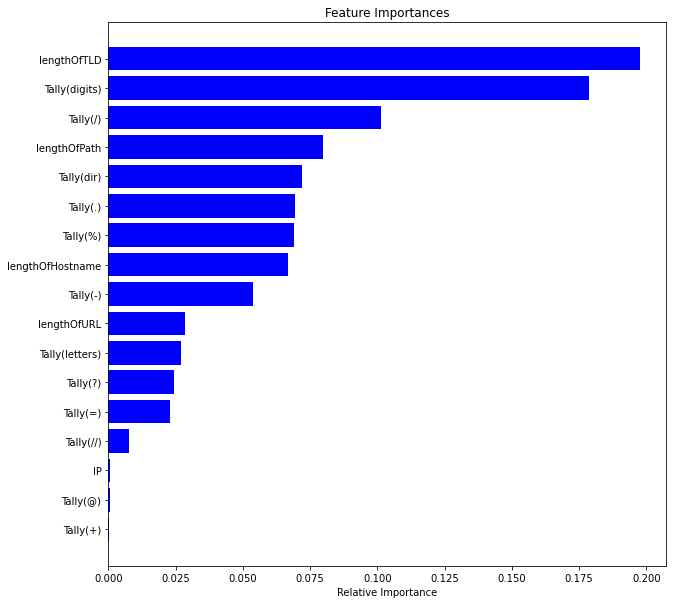

In [38]:
features = urls.drop(columns=['Unnamed: 0','url','result','type','result_final','result1']).columns
importances = dt1.feature_importances_
indices = np.argsort(importances)
for i in range(len(indices)):
    print(features[i]," has importance of ",importances[i])
plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Testing

In [39]:
def lengthOfURL(url):
    return len(str(url))

def lengthOfHostname(url):
    return len(urlparse(url).netloc)

def lengthOfPath(url):
    return len(urlparse(url).path)

def tld(url):
    x=get_tld(url,fail_silently=True)
    try:
        return len(x)
    except:
        return -1

def Tally_dot(url):
    return url.count('.')

def Tally_us(url):
    return url.count('-')

def Tally_atr(url):
    return url.count('@')

def Tally_per(url):
    return url.count('%')

def Tally_eq(url):
    return url.count('=')

def Tally_sl(url):
    return url.count('/')

def Tally_qu(url):
    return url.count('?')

def Tally_pl(url):
    return url.count('+')

def Tally_dsl(url):
    return url.count('//')

def directories(url):
    urldir = urlparse(url).path
    return urldir.count('/')

def digit(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits

def letter(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters

def ip_address(url):
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|' 
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)'
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}', url) 
    if match:
        return 1
    else:
        return 0

def parameter(url):
    l=[lengthOfURL(url),lengthOfHostname(url),lengthOfPath(url),tld(url),Tally_dot(url),Tally_us(url),Tally_atr(url),Tally_per(url),
       Tally_eq(url),Tally_sl(url),Tally_qu(url),Tally_pl(url),Tally_dsl(url),directories(url),digit(url),letter(url),ip_address(url)]
    return l

l1=parameter("http://localhost:8888/notebooks/Capstone%20Project/Multi-Class%20Classification%20using%20Decision%20Tree.ipynb")
print(l1)

p=np.array([l1])

multi_output_prediction = clf.predict(p)

multi_output_prediction_probability = clf.predict_proba(p)

multi_class_prediction = dt1.predict(p)

print(multi_output_prediction, multi_class_prediction, multi_output_prediction_probability)

[111, 14, 90, -1, 1, 1, 0, 5, 0, 5, 0, 0, 1, 3, 14, 83, 0]
[[1 0 0 0]] [1] [[0.61366639 0.37491905 0.38202253 0.09499745]]
